<a href="https://colab.research.google.com/github/seonae0223/mid_project/blob/main/%EA%B3%A0%EA%B0%9D_%ED%88%AC%EC%9E%90_%EC%84%B1%ED%96%A5_%ED%81%B4%EB%9F%AC%EC%8A%A4%ED%84%B0%EB%A7%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path = "/content/drive/MyDrive/Hantoss_MidProject/data/2023_cleaned_real_final.csv"

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
df = pd.read_csv(file_path)

In [5]:
df.head()

,Household_ID,Metropolitan_Area,Householder_Gender,Household_Size,Elderly_Household,Grandparent_Grandchild_Household,Single_Parent_Household,Multicultural_Household,Disabled_Household,Householder_Education_Level,...,Non_Consumption_Expenditure_Annual_Interest,Surplus_Funds_Management_Plan,Financial_Asset_Investment_Method,Financial_Asset_Investment_Considerations,Residential_Property_Price_Outlook,Surplus_Funds_Real_Estate_Investment,Financial_Debt_Outlook_1_Year,Householder_Retirement_Status,Householder_Pre_Retirement_Preparedness,Householder_Retirement_Living_Expense_Adequacy
0,10000162,0,2,1,0,1,1,1,1,0,...,0,1,1,2,3,2,2,1,5,0
1,10000182,0,1,2,1,1,1,1,1,2,...,0,2,1,2,2,2,2,1,3,0
2,10000192,0,2,1,1,1,1,1,1,2,...,10,1,1,1,4,2,2,1,5,0
3,10000212,1,2,1,0,1,1,1,1,0,...,0,1,1,1,2,2,2,1,3,0
4,10000222,1,1,1,1,1,1,1,1,2,...,178,5,7,1,1,2,1,1,3,0


In [6]:
pip install kmodes

  0%|          | 0/9 [00:00<?, ?it/s]

Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
In

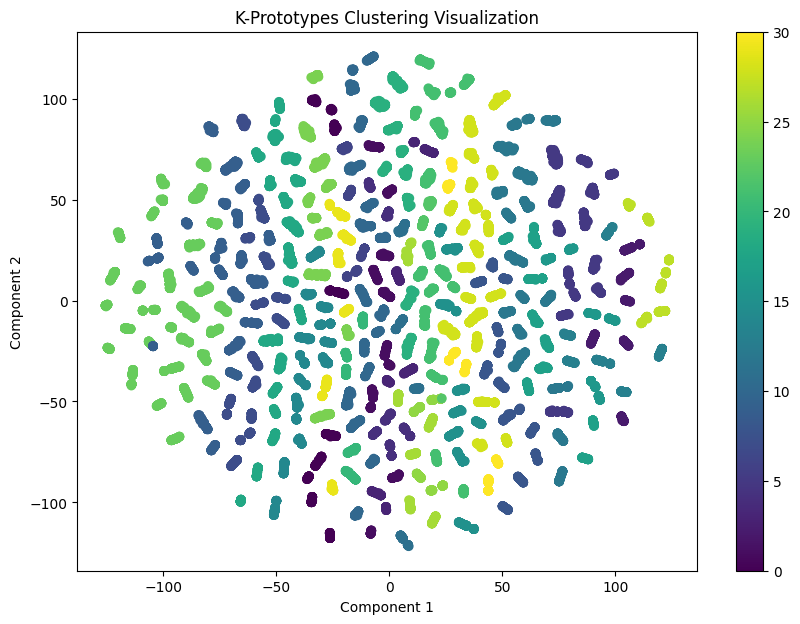

 11%|█         | 1/9 [56:46<7:34:15, 3406.88s/it]

Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
In

 11%|█         | 1/9 [1:32:37<12:20:57, 5557.20s/it]


ValueError: Clustering algorithm could not initialize. Consider assigning the initial clusters manually.

In [7]:
from kmodes.kprototypes import KPrototypes
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tqdm import tqdm


# 범주형 변수
categorical_columns = [
    'Metropolitan_Area',
    'Householder_Gender',
    'Household_Size','Elderly_Household','Grandparent_Grandchild_Household','Single_Parent_Household', 'Multicultural_Household','Disabled_Household',
    'Householder_Education_Level','Householder_Cohabitation_Status','Householder_Industry','Householder_Occupation','Householder_Age_Group',
    'Householder_Employment_Status',  'Householder_Marital_Status', 'Housing_Type','Housing_Category', 'Debt_Ownership',
    'Income_Decile','Total_Asset_Decile','Net_Asset_Decile', 'Surplus_Funds_Management_Plan',
    'Financial_Asset_Investment_Method','Financial_Asset_Investment_Considerations','Residential_Property_Price_Outlook','Surplus_Funds_Real_Estate_Investment',
    'Financial_Debt_Outlook_1_Year', 'Householder_Retirement_Status', 'Householder_Pre_Retirement_Preparedness','Householder_Retirement_Living_Expense_Adequacy'
]



# 열을 카테고리컬 타입으로 변환
df[categorical_columns] = df[categorical_columns].astype('category')

numerical_columns = df.select_dtypes(include=[float, int]).columns.tolist()

cls_num = [31,32,33,34,35,36,37,38,39]


for cls in tqdm(cls_num):
  kproto = KPrototypes(n_clusters = cls, init='Huang', verbose=2, random_state=42)
  clusters = kproto.fit_predict(df, categorical=[df.columns.get_loc(col) for col in categorical_columns])

  df['cluster'] = clusters

  #t-SNE 사용 (PCA보다 더 잘 시각화될 수 있음)
  tsne = TSNE(n_components=2, random_state=42)
  components = tsne.fit_transform(df[numerical_columns])

  # 시각화
  plt.figure(figsize=(10, 7))
  scatter = plt.scatter(components[:, 0], components[:, 1], c=clusters, cmap='viridis', marker='o')
  plt.colorbar(scatter)
  plt.title('K-Prototypes Clustering Visualization')
  plt.xlabel('Component 1')
  plt.ylabel('Component 2')
  plt.show()


In [ ]:
cls_num = [50]


for cls in tqdm(cls_num):
  kproto = KPrototypes(n_clusters = cls, init='Huang', verbose=2, random_state=42)
  clusters = kproto.fit_predict(df, categorical=[df.columns.get_loc(col) for col in categorical_columns])

  df['cluster'] = clusters

  #t-SNE 사용 (PCA보다 더 잘 시각화될 수 있음)
  tsne = TSNE(n_components=2, random_state=42)
  components = tsne.fit_transform(df[numerical_columns])

  # 시각화
  plt.figure(figsize=(10, 7))
  scatter = plt.scatter(components[:, 0], components[:, 1], c=clusters, cmap='viridis', marker='o')
  plt.colorbar(scatter)
  plt.title('K-Prototypes Clustering Visualization')
  plt.xlabel('Component 1')
  plt.ylabel('Component 2')
  plt.show()


In [ ]:
cls_num = [60]


for cls in tqdm(cls_num):
  kproto = KPrototypes(n_clusters = cls, init='Huang', verbose=2, random_state=42)
  clusters = kproto.fit_predict(df, categorical=[df.columns.get_loc(col) for col in categorical_columns])

  df['cluster'] = clusters

  #t-SNE 사용 (PCA보다 더 잘 시각화될 수 있음)
  tsne = TSNE(n_components=2, random_state=42)
  components = tsne.fit_transform(df[numerical_columns])

  # 시각화
  plt.figure(figsize=(10, 7))
  scatter = plt.scatter(components[:, 0], components[:, 1], c=clusters, cmap='viridis', marker='o')
  plt.colorbar(scatter)
  plt.title('K-Prototypes Clustering Visualization')
  plt.xlabel('Component 1')
  plt.ylabel('Component 2')
  plt.show()


In [ ]:
cls_num = [80]


for cls in tqdm(cls_num):
  kproto = KPrototypes(n_clusters = cls, init='Huang', verbose=2, random_state=42)
  clusters = kproto.fit_predict(df, categorical=[df.columns.get_loc(col) for col in categorical_columns])

  df['cluster'] = clusters

  #t-SNE 사용 (PCA보다 더 잘 시각화될 수 있음)
  tsne = TSNE(n_components=2, random_state=42)
  components = tsne.fit_transform(df[numerical_columns])

  # 시각화
  plt.figure(figsize=(10, 7))
  scatter = plt.scatter(components[:, 0], components[:, 1], c=clusters, cmap='viridis', marker='o')
  plt.colorbar(scatter)
  plt.title('K-Prototypes Clustering Visualization')
  plt.xlabel('Component 1')
  plt.ylabel('Component 2')
  plt.show()


In [ ]:
cls_num = [100]


for cls in tqdm(cls_num):
  kproto = KPrototypes(n_clusters = cls, init='Huang', verbose=2, random_state=42)
  clusters = kproto.fit_predict(df, categorical=[df.columns.get_loc(col) for col in categorical_columns])

  df['cluster'] = clusters

  #t-SNE 사용 (PCA보다 더 잘 시각화될 수 있음)
  tsne = TSNE(n_components=2, random_state=42)
  components = tsne.fit_transform(df[numerical_columns])

  # 시각화
  plt.figure(figsize=(10, 7))
  scatter = plt.scatter(components[:, 0], components[:, 1], c=clusters, cmap='viridis', marker='o')
  plt.colorbar(scatter)
  plt.title('K-Prototypes Clustering Visualization')
  plt.xlabel('Component 1')
  plt.ylabel('Component 2')
  plt.show()
